##Loading the Dataset

In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
data = pd.read_csv('Credit.csv')

# Display the first few rows of the dataset
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Credit.csv'

In [ ]:
len(data)

1000

##Understanding the Dataset

In [ ]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

##Data Distribution

<Axes: xlabel='Class'>

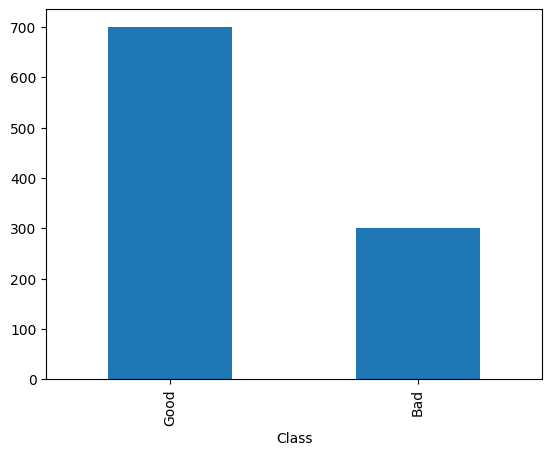

In [ ]:
# Distribution of the target variable
data['Class'].value_counts().plot(kind='bar')

In [ ]:
data['Class_code'] = data['Class'].map({'Good': 0, 'Bad': 1})  # Target (0 for Good, 1 for Bad)

features = data.drop(columns=['Class', 'Class_code'])
target = data['Class_code']

In [ ]:
# Initialize lists to store significant variables
significant_vars = []
p_values = []

# Calculate Pearson correlation and p-values for each feature against the target
for col in features.columns:
    correlation, p_value = stats.pearsonr(data[col], target)
    p_values.append(p_value)
    if p_value < 0.05:  # Assuming a significance level of 0.05
        significant_vars.append(col)

<ipython-input-7-223cfce55c85>:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = stats.pearsonr(data[col], target)


In [ ]:
#The significant variables for Class
significant_vars

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'Age',
 'ForeignWorker',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Radio.Television',
 'Purpose.Education',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.4.to.7',
 'Personal.Female.NotSingle',
 'Personal.Male.Single',
 'OtherDebtorsGuarantors.CoApplicant',
 'Property.RealEstate',
 'Property.Unknown',
 'OtherInstallmentPlans.Bank',
 'OtherInstallmentPlans.None',
 'Housing.Rent',
 'Housing.Own',
 'Housing.ForFree']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data_without_class = data.drop(columns=['Class','Class_code'])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_class)
scaled_data_df = pd.DataFrame(scaled_data, columns=data_without_class.columns)


In [ ]:
scaled_data_df

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,-1.214598,0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,0.766356,-0.416784
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.823318,0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,0.766356,-0.416784
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0.823318,0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,2.0,-1.304877,-0.416784
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,0.823318,0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,-1.576173,2.873893,-0.149983,-0.5,0.766356,-0.416784
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0.823318,0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,-1.576173,2.873893,-0.149983,-0.5,0.766356,-0.416784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,0.823318,0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,2.0,-1.304877,-0.416784
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,-1.214598,0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,-1.304877,2.399324
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,0.823318,0.196014,-0.614337,...,-0.401796,-0.222076,0.478018,-0.466933,0.634448,-0.347960,-0.149983,-0.5,0.766356,-0.416784
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,-1.214598,0.196014,1.627770,...,-0.401796,-0.222076,0.478018,-0.466933,-1.576173,2.873893,-0.149983,-0.5,0.766356,-0.416784


In [ ]:
X = scaled_data_df[significant_vars]
y = data['Class_code']

In [ ]:
data

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Class_code
0,6,1169,4,4,67,2,1,0,1,Good,...,0,1,0,1,0,0,0,1,0,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,1,0,1,0,0,0,1,0,1
2,12,2096,2,3,49,1,2,1,1,Good,...,0,1,0,1,0,0,1,0,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,1,0,0,1,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,1,Good,...,0,1,0,1,0,0,1,0,0,0
996,30,3857,4,4,40,1,1,0,1,Good,...,0,1,0,1,0,0,0,0,1,0
997,12,804,4,4,38,1,1,1,1,Good,...,0,1,0,1,0,0,0,1,0,0
998,45,1845,4,4,23,1,1,0,1,Bad,...,0,1,0,0,1,0,0,1,0,1


##No Splitting of Data

In [ ]:
# Logistic regression model
model = LogisticRegression(solver ='lbfgs')
model.fit(X, y)

LogisticRegression()

In [ ]:
prob_threshold = [0.20, 0.35, 0.50]

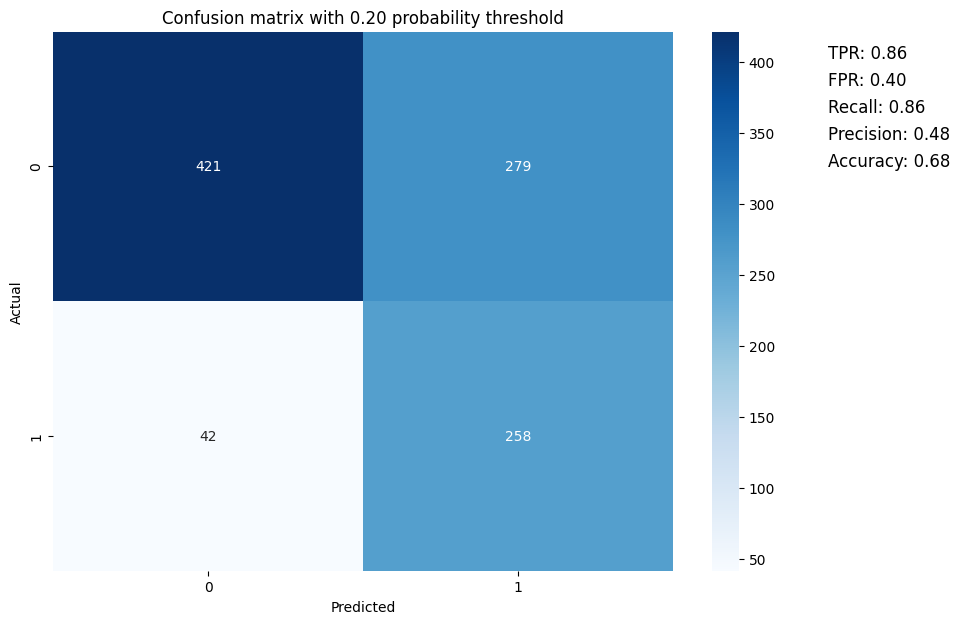

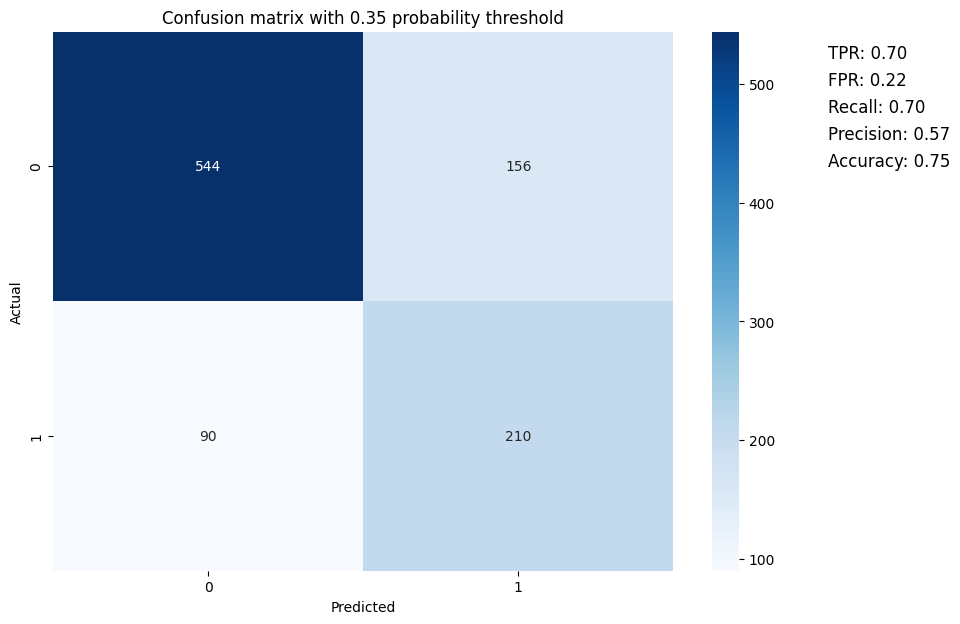

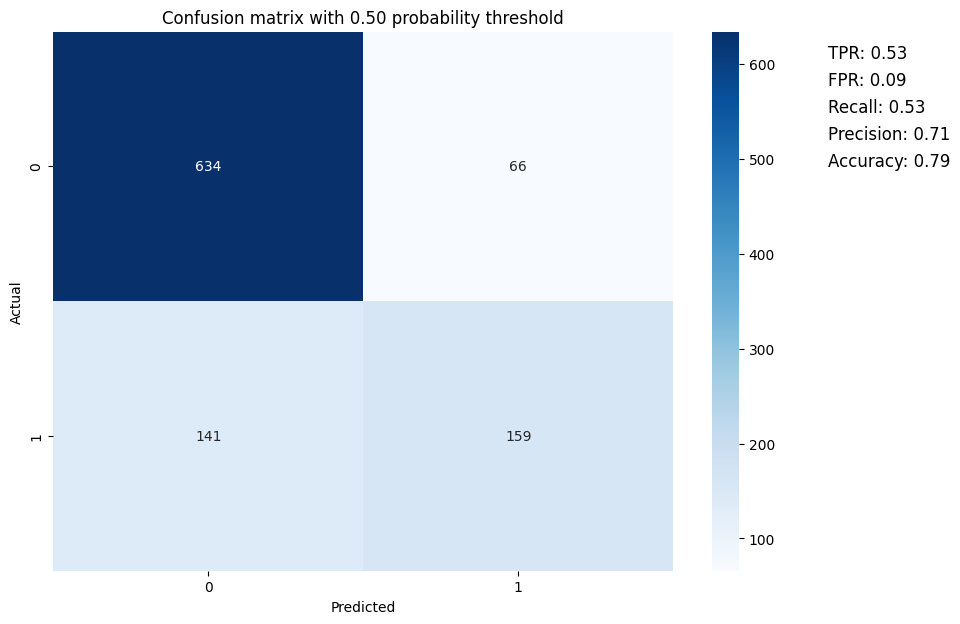

In [ ]:
results = []
for prob_thres in prob_threshold:
  y_prob = model.predict_proba(X)[:,1]
  y_pred = (y_prob >= prob_thres).astype(int)
  conf_matrix = confusion_matrix(y, y_pred)

  #To calculate the TPR and FPR
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculating TPR, FPR, Recall, Precision, and Accuracy
  TPR = TP / (TP + FN)  # True Positive Rate
  FPR = FP / (FP + TN)  # False Positive Rate
  Recall = TPR  # Recall is the same as TPR
  Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
  Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy

  # Plotting the confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion matrix with {prob_thres:.2f} probability threshold")
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  # Adding text with calculated metrics to the plot
  plt.text(2.5, 0.1, f"TPR: {TPR:.2f}", fontsize=12)
  plt.text(2.5, 0.2, f"FPR: {FPR:.2f}", fontsize=12)
  plt.text(2.5, 0.3, f"Recall: {Recall:.2f}", fontsize=12)
  plt.text(2.5, 0.4, f"Precision: {Precision:.2f}", fontsize=12)
  plt.text(2.5, 0.5, f"Accuracy: {Accuracy:.2f}", fontsize=12)

  # Show the plot
  plt.show()

##Splitting the data

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Logistic regression model
model = LogisticRegression(solver ='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

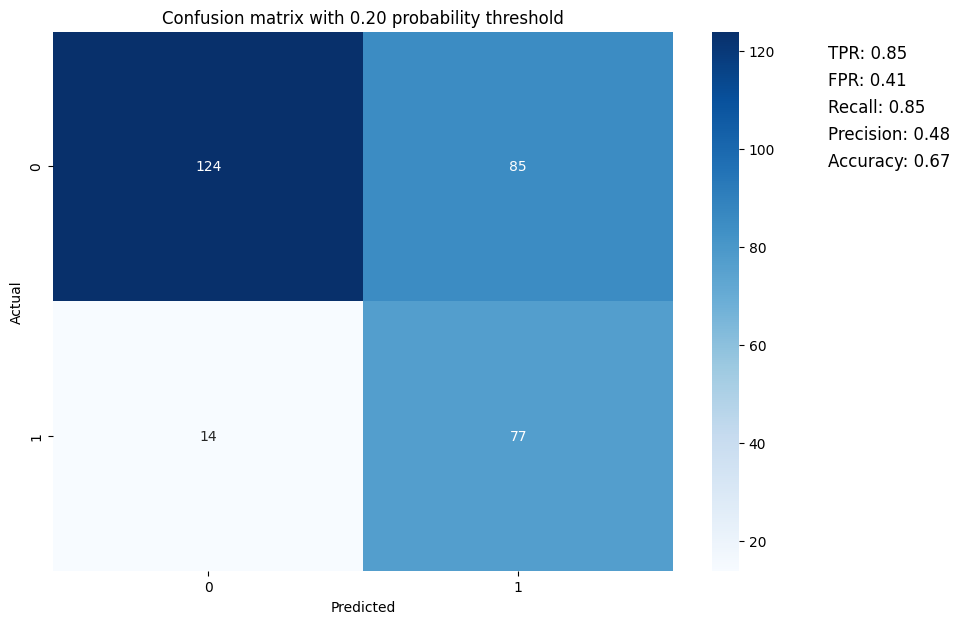

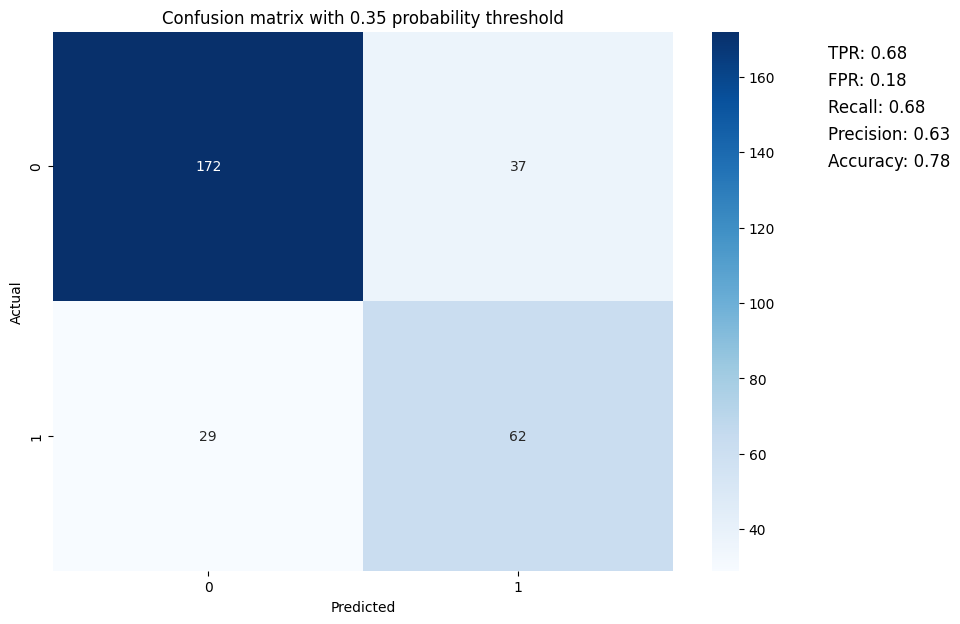

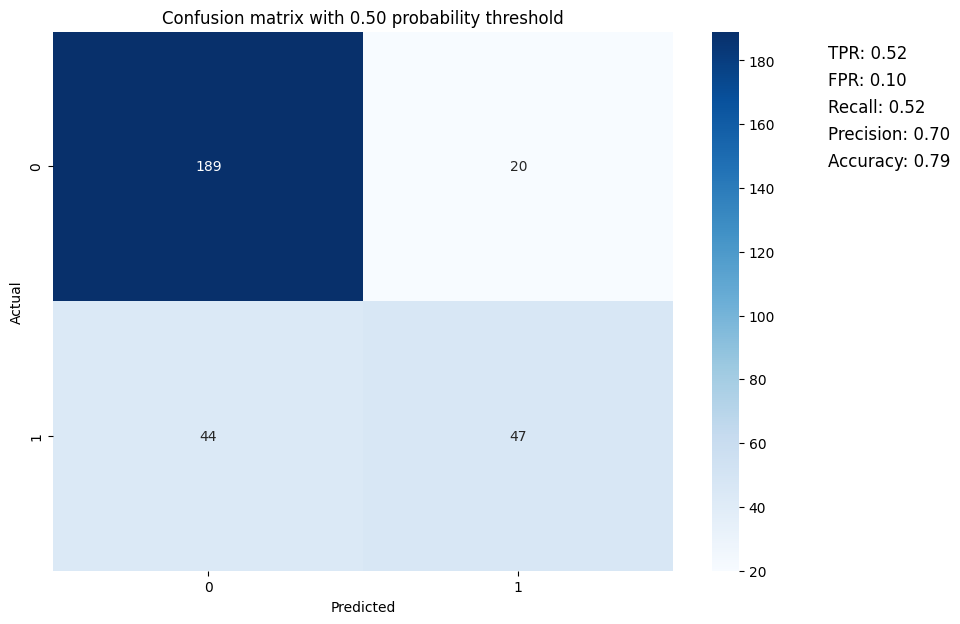

In [ ]:
results = []
for prob_thres in prob_threshold:
  y_prob = model.predict_proba(X_test)[:,1]
  y_pred = (y_prob >= prob_thres).astype(int)
  conf_matrix = confusion_matrix(y_test, y_pred)

  #To calculate the TPR and FPR
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculating TPR, FPR, Recall, Precision, and Accuracy
  TPR = TP / (TP + FN)  # True Positive Rate
  FPR = FP / (FP + TN)  # False Positive Rate
  Recall = TPR  # Recall is the same as TPR
  Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
  Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy

  # Plotting the confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion matrix with {prob_thres:.2f} probability threshold")
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  # Adding text with calculated metrics to the plot
  plt.text(2.5, 0.1, f"TPR: {TPR:.2f}", fontsize=12)
  plt.text(2.5, 0.2, f"FPR: {FPR:.2f}", fontsize=12)
  plt.text(2.5, 0.3, f"Recall: {Recall:.2f}", fontsize=12)
  plt.text(2.5, 0.4, f"Precision: {Precision:.2f}", fontsize=12)
  plt.text(2.5, 0.5, f"Accuracy: {Accuracy:.2f}", fontsize=12)

  # Show the plot
  plt.show()

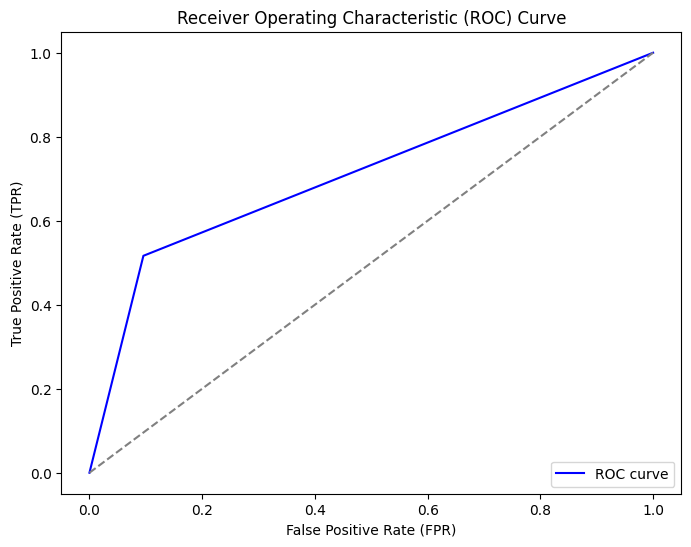

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"Area Under the Curve (AUC): {auc:.4f}")

Area Under the Curve (AUC): 0.7104


##Support Vector Machine

In [ ]:
X = scaled_data_df[significant_vars]
y = data['Class_code']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Initialize the SVM model
svc = SVC()

# Perform grid search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Print the best parameters
print(grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.721 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.743 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.643 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

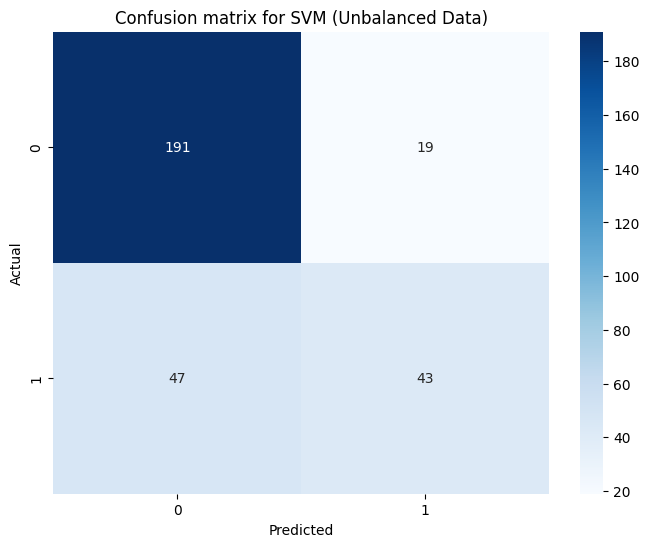

True Positive Rate (TPR): 0.4777777777777778
False Positive Rate (FPR): 0.09047619047619047
Recall: 0.4777777777777778
Precision: 0.6935483870967742
Accuracy: 0.78


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Fit a Support Vector Machine classifier
svm_clf = SVC(kernel='linear', C=0.1, gamma=1, random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix for SVM (Unbalanced Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#To calculate the TPR and FPR
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating TPR, FPR, Recall, Precision, and Accuracy
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Recall = TPR  # Recall is the same as TPR
Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy

# Display the results
print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("Recall:", Recall)
print("Precision:", Precision)
print("Accuracy:", Accuracy)



##Using SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


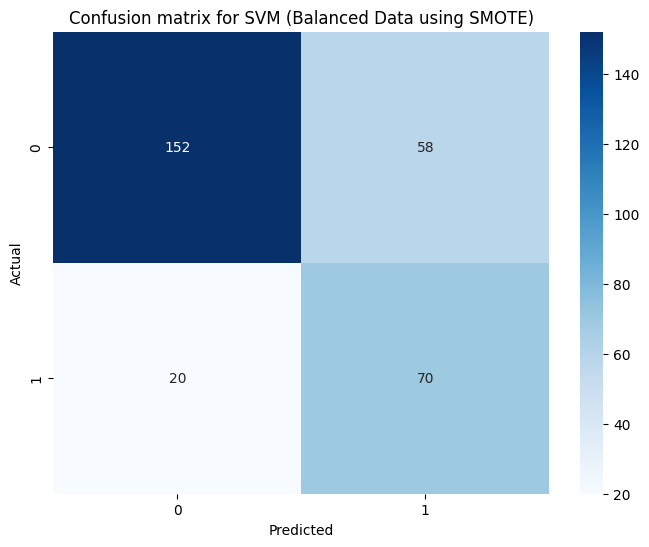

True Positive Rate (TPR): 0.7777777777777778
False Positive Rate (FPR): 0.2761904761904762
Recall: 0.7777777777777778
Precision: 0.546875
Accuracy: 0.74


In [ ]:
# Train the SVM model on the resampled training data
svm_clf = SVC(kernel='linear', C=0.1, gamma=1, random_state=42)
svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix for SVM (Balanced Data using SMOTE)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#To calculate the TPR and FPR
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating TPR, FPR, Recall, Precision, and Accuracy
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Recall = TPR  # Recall is the same as TPR
Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy

# Display the results
print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("Recall:", Recall)
print("Precision:", Precision)
print("Accuracy:", Accuracy)